In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime #Monday's weekday is 0
from matplotlib import pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#import datasets
train = pd.read_csv('../input/train.csv')

In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


1. **Feature Engineering**

In [8]:
 # Creating three new features: weekday, hour and trip duration and add them to an engineered dataset
train_eng = train
train_eng['pickup_datetime'] = train.pickup_datetime.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
train_eng['dropoff_datetime'] = train.dropoff_datetime.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
train_eng['pickup_weekday'] = train_eng.pickup_datetime.apply(datetime.weekday)
train_eng['pickup_hour'] = train_eng.pickup_datetime.apply(lambda x: x.hour)
train_eng['trip_duration'] = train_eng['dropoff_datetime'] - train_eng['pickup_datetime'] 
train_eng['trip_duration_in_seconds'] = train_eng['trip_duration'].apply(lambda x : x.seconds)

In [9]:
train_eng.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_weekday,pickup_hour,trip_duration_in_seconds
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,0 days 00:15:59.492272,3.050375e+00,1.360648e+01,9.529766e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,0 days 01:27:17.431724,1.954039e+00,6.399693e+00,3.172881e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0 days 00:00:01,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,0 days 00:06:37,1.000000e+00,9.000000e+00,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,0 days 00:11:02,3.000000e+00,1.400000e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,0 days 00:17:55,5.000000e+00,1.900000e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,40 days 19:31:22,6.000000e+00,2.300000e+01,8.639200e+04


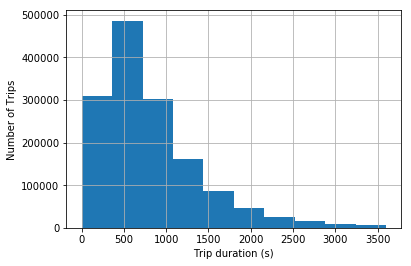

In [18]:
fig1 = train_eng[train_eng['trip_duration_in_seconds']<3600*1].trip_duration_in_seconds.hist()
fig1.set_xlabel("Trip duration (s)")
fig1.set_ylabel("Number of Trips")
plt.show()